<a href="https://colab.research.google.com/github/marcinszulczyk/deeplearning_prediction_learning/blob/main/prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression witch Neutral Network in TensorFlow

In [2]:
# import TensorFlow
import tensorflow as tf

print (tf.__version__)

2.9.2


# Creating data to view and fit

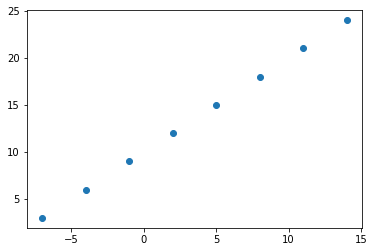

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.arange (-7, 15, 3, dtype=np.float32)
y = X + 10

# Visualize data

plt.scatter(X, y)


# Input and output shapes

In [4]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [5]:
X[0].ndim

0

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

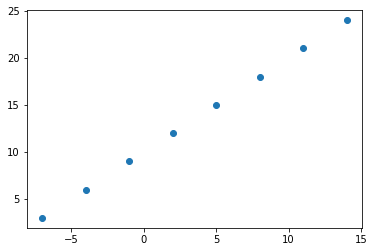

In [8]:
plt.scatter(X, y)

# Steps in modeling witch TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function and the optimizer and evaluation metrics.
3. **Fitting a model**

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])   
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 583ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 99ms/step


array([[12.716021]], dtype=float32)

# Improving our model

We can improve our model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units witch each of the hideen layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** or on more data

In [ ]:
# New model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.fit(X,y, epochs=100)

In [13]:
# Let's see if our model's prediction has improved...
model.predict([17])

1/1 [==============================] - 0s 56ms/step


array([[30.158512]], dtype=float32)

In [32]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
  tf.keras.layers.Dense(1)    
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["mae"]
)

# 3. fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 534ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - 

In [33]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
model.predict([17])

1/1 [==============================] - 0s 60ms/step


array([[26.206875]], dtype=float32)

# Evaluating a model

When it comes to evaluation... there are 3 word you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* **The data** - what data are we working witch? What does il look like?
* **The model itself** - what does a model perform while it learns?
* **The predictions of the model** - how do the predictions of a model line up against the ground truth (the oryginal labels)?

In [35]:
X = tf.range (-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [36]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

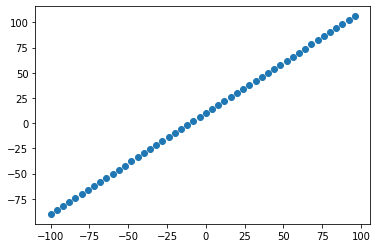

In [37]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### THe 3 sets...

* **Training set**- 70-80%
* **Validation set** - 10-15%
* **Test set** - 10-15%

In [45]:
X_train = X[:int(len(X)*0.8)]
y_train = y[:int(len(y)*0.8)]

X_test = X[int(len(X)*0.8):]
y_test = y[int(len(y)*0.8):]

len(X_train), len (X_test)

(40, 10)

# Visualing the data

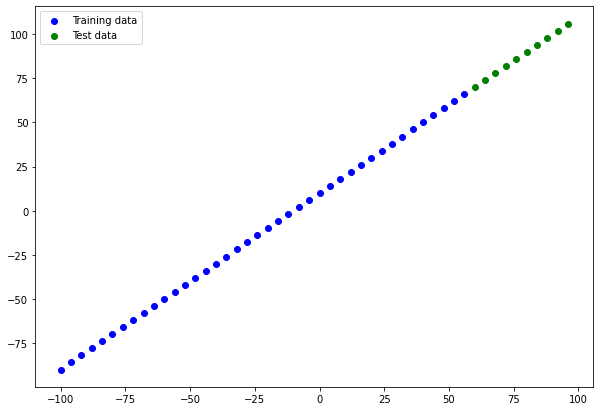

In [48]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Test data")
plt.legend()

In [80]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="myInput_layer"),
  tf.keras.layers.Dense(1, name="myOutput_layer")
], name="First_model" )

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(X_train, y_train, epochs = 100, verbose=0)

y_pred = model.predict(X_test)

1/1 [==============================] - 0s 48ms/step


# Common function

In [81]:
from tensorflow.keras.utils import plot_model

def model_summary(model):
  print(model.summary())
  plot_model(model)

def plot_model_prediction(train_data=X_train,
                          train_label=y_train,
                          test_data=X_test,
                          test_labels=y_test,
                          predictions=y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c='g', label="Test data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend()

Model: "First_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 myInput_layer (Dense)       (None, 10)                20        
                                                                 
 myOutput_layer (Dense)      (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


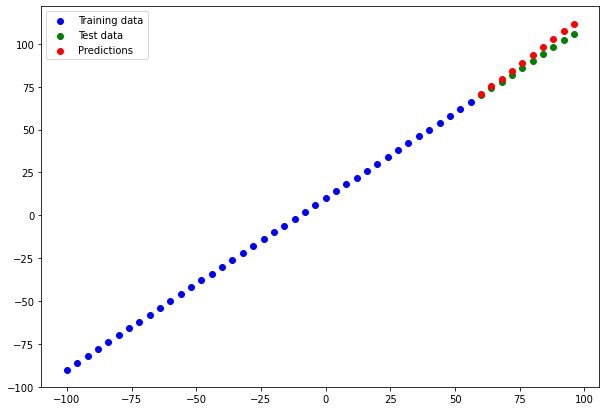

In [82]:
model_summary(model)
plot_model_prediction()